In [1]:
import sys
import os, glob
import csv 
import calendar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import pandas as pd

In [2]:
def get_daily_clim(df,var):
    
    tmp = df
    df_mean = tmp.groupby(tmp.index.dayofyear).mean()
    df_min = tmp.groupby(tmp.index.dayofyear).min()
    df_max = tmp.groupby(tmp.index.dayofyear).max()
    
    out_min = np.delete(df_min[var].values.flatten(),60)
    out_mean = np.delete(df_mean[var].values.flatten(),60)
    out_max = np.delete(df_max[var].values.flatten(),60)
    
    x = pd.date_range(datetime(2021,1,1),datetime(2021,12,31),freq='D')
    df_out = pd.DataFrame({'day_min':out_min,'day_mean':out_mean,'day_max':out_max},index = x)
    
    return df_out

In [3]:
# Load Phenocam data (daily 2017-2023)
in_dir = '../data/'
filename = os.path.join(in_dir+'Heat_Dome_PhenoCam_Data_2017-2023.csv')
df_gcc = pd.read_csv(filename,index_col=0,parse_dates=True, squeeze=True,header=0,skiprows = [i for i in range(1,2) ])


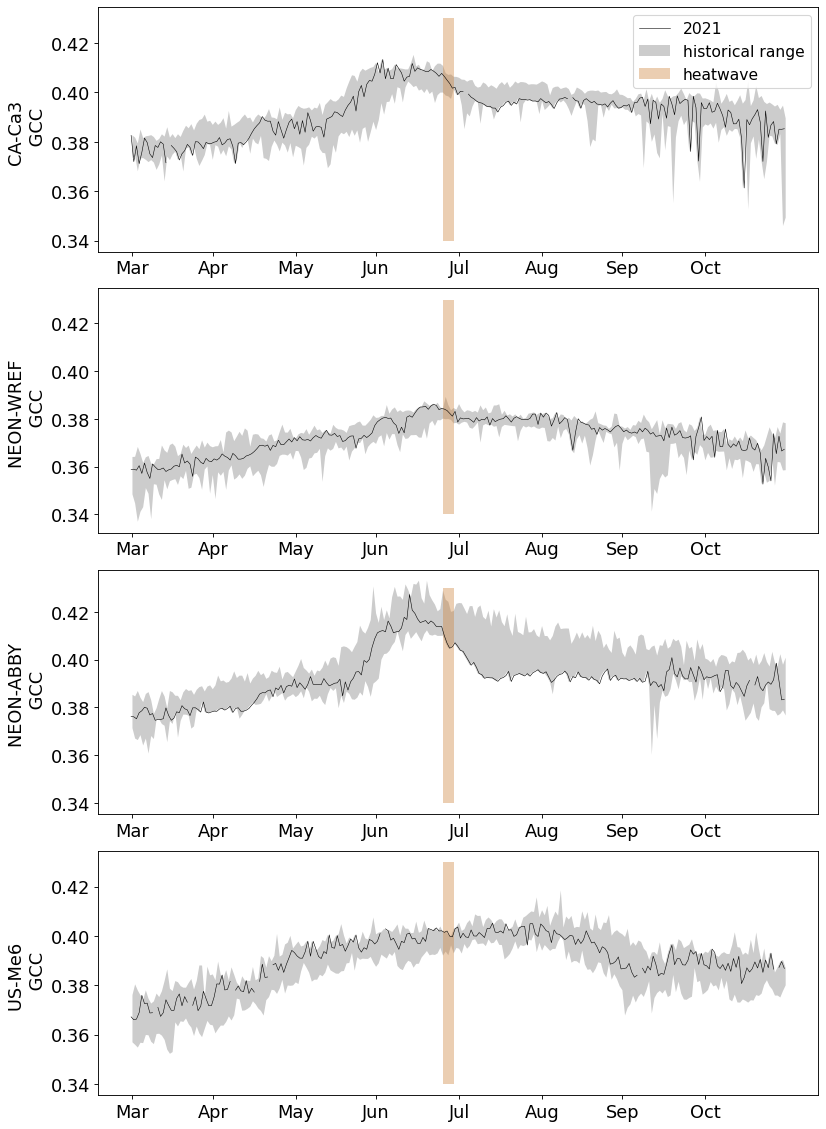

In [4]:
# GCC
plt.figure(num=None, figsize=(12, 16), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0, hspace=0.15)
plt.rcParams.update({'font.size': 16})

st = datetime(2021,3,1); en = datetime(2021,10,31)
x = pd.date_range(st,en,freq='D')
x2 = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')
x1 = x - pd.Timedelta(hours=12)
dates = pd.date_range(start='2021-03-1', end='2021-11-2', freq='M')

# CA-Ca3
ax1 = plt.subplot(4,1,1)
var = ['vancouverisland (CA-Ca3)']
df_day_clim = get_daily_clim(df_gcc,var)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.4,label='historical range')
ax1.fill_between(x2, np.tile(0.34,len(x2)),np.tile(0.43,len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
ax1.plot(x1,df_gcc[var][st:en],label='2021',color='k',linewidth=0.5)
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right',fontsize=14)
ax1.set_ylabel('CA-Ca3 \n '+ r'GCC')

# NEON-WREF
ax1 = plt.subplot(4,1,2)
var = 'WREF NEON'
df_day_clim = get_daily_clim(df_gcc,var)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.4,label='historical range')
ax1.fill_between(x2, np.tile(0.34,len(x2)),np.tile(0.43,len(x2)),facecolor='peru',alpha=0.4)
ax1.plot(x1,df_gcc[var][st:en],label='2021',color='k',linewidth=0.5)
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
ax1.set_ylabel('NEON-WREF \n '+ r'GCC')

# NEON-ABBY
ax1 = plt.subplot(4,1,3)
var = 'ABBY NEON'
df_day_clim = get_daily_clim(df_gcc,var)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.4,label='historical range')
ax1.fill_between(x2, np.tile(0.34,len(x2)),np.tile(0.43,len(x2)),facecolor='peru',alpha=0.4)
ax1.plot(x1,df_gcc[var][st:en],label='2021',color='k',linewidth=0.5)
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
#plt.legend(loc='upper right',fontsize=14)
ax1.set_ylabel('NEON-ABBY \n '+ r'GCC')

# US-Me6
ax1 = plt.subplot(4,1,4)
var = 'oregonYP (US-Me6)'
df_day_clim = get_daily_clim(df_gcc,var)
ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.4,label='historical range')
ax1.fill_between(x2, np.tile(0.34,len(x2)),np.tile(0.43,len(x2)),facecolor='peru',alpha=0.4)
ax1.plot(x1,df_gcc[var][st:en],label='2021',color='k',linewidth=0.5)
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
#plt.legend(loc='upper right',fontsize=14)
ax1.set_ylabel('US-Me6 \n '+ r'GCC')

plt.savefig('../figs/Climatology_daily_GCC_w2021.png',dpi=80)

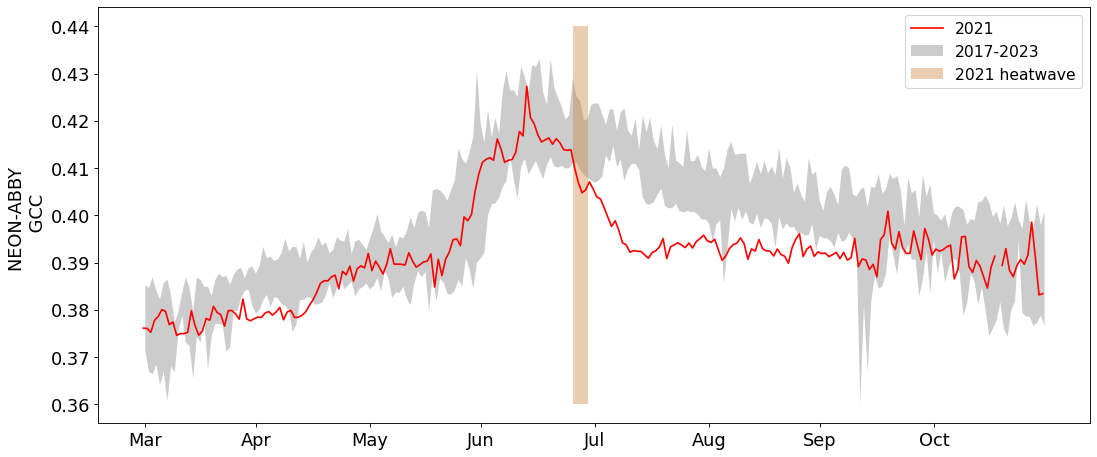

In [5]:
### Just ABBY

# GCC
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0, hspace=0.15)
plt.rcParams.update({'font.size': 16})

st = datetime(2021,3,1); en = datetime(2021,10,31)
x = pd.date_range(st,en,freq='D')
x2 = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')
x1 = x - pd.Timedelta(hours=12)
dates = pd.date_range(start='2021-03-1', end='2021-11-2', freq='M')



# NEON-ABBY
ax1 = plt.subplot(1,1,1)
var = 'ABBY NEON'
tmp = df_gcc.copy()
tmp[datetime(2021,1,1):datetime(2021,12,31)] = np.NaN
df_day_clim = get_daily_clim(tmp,'ABBY NEON')

ax1.fill_between(x, df_day_clim['day_min'][st:en], df_day_clim['day_max'][st:en], facecolor='grey', alpha=0.4,label='2017-2023')
ax1.fill_between(x2, np.tile(0.36,len(x2)),np.tile(0.44,len(x2)),facecolor='peru',alpha=0.4,label='2021 heatwave')
ax1.plot(x1,df_gcc[var][st:en],label='2021',color='r',linewidth=1.5)
plt.xticks(dates - pd.Timedelta(days=30), [date.strftime('%b') for date in dates])
plt.legend(loc='upper right',fontsize=14)
ax1.set_ylabel('NEON-ABBY \n '+ r'GCC')

plt.tight_layout()
plt.savefig('../figs/figure4_abby_GCC_clim_red.png',dpi=80)